# Hull Project

## Import Modules

In [1]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 12]

## Exploratory Analysis

### Read Data

In [2]:
df = pd.read_csv("20150617_white_paper_indicators.csv")

### Check First Lines

In [3]:
df.head()

,Date,DP,PE,BM,CAPE,PCA.price,BY,DEF,TERM,CAY,...,CPI,PCR,MA,PCA.tech,OIL,SI,futureRet1M,futureRet3M,futureRet6M,futureRet1Y
0,6/1/1990,NaN,16.6500,0.470168,19.429152,NaN,0.000000,0.90,0.515,0.016121,...,0.0,-2.059092,1,2.229210,-0.204582,1.2753,-0.008295,-0.116913,-0.095993,0.070867
1,6/4/1990,NaN,16.8444,0.464727,19.655993,NaN,-0.013766,0.91,0.492,0.016121,...,0.0,-2.038942,1,2.229210,-0.120243,1.2753,-0.032420,-0.124505,-0.110181,0.054709
2,6/5/1990,NaN,16.8096,0.465766,19.615333,NaN,0.009080,0.95,0.505,0.016121,...,0.0,-2.035081,1,2.225837,-0.226973,1.2753,-0.022675,-0.134623,-0.112129,0.055955
3,6/6/1990,NaN,16.7325,0.467946,19.525453,NaN,0.004995,0.96,0.513,0.016121,...,0.0,-2.043098,1,2.225837,-0.205495,1.2753,-0.015018,-0.120898,-0.104064,0.053689
4,6/7/1990,NaN,16.6495,0.469395,19.428617,NaN,-0.002955,0.93,0.486,0.016121,...,0.0,-2.040079,0,2.225837,-0.203394,1.2753,-0.018510,-0.121414,-0.106570,0.054863


### Change Index

In [4]:
df.index = pd.to_datetime(df.Date, infer_datetime_format=True)
del df['Date']
df.head()

,DP,PE,BM,CAPE,PCA.price,BY,DEF,TERM,CAY,SIM,...,CPI,PCR,MA,PCA.tech,OIL,SI,futureRet1M,futureRet3M,futureRet6M,futureRet1Y
Date,,,,,,,,,,,,,,,,,,,,,
1990-06-01,NaN,16.6500,0.470168,19.429152,NaN,0.000000,0.90,0.515,0.016121,0.776923,...,0.0,-2.059092,1,2.229210,-0.204582,1.2753,-0.008295,-0.116913,-0.095993,0.070867
1990-06-04,NaN,16.8444,0.464727,19.655993,NaN,-0.013766,0.91,0.492,0.016121,0.769231,...,0.0,-2.038942,1,2.229210,-0.120243,1.2753,-0.032420,-0.124505,-0.110181,0.054709
1990-06-05,NaN,16.8096,0.465766,19.615333,NaN,0.009080,0.95,0.505,0.016121,0.761538,...,0.0,-2.035081,1,2.225837,-0.226973,1.2753,-0.022675,-0.134623,-0.112129,0.055955
1990-06-06,NaN,16.7325,0.467946,19.525453,NaN,0.004995,0.96,0.513,0.016121,0.753846,...,0.0,-2.043098,1,2.225837,-0.205495,1.2753,-0.015018,-0.120898,-0.104064,0.053689
1990-06-07,NaN,16.6495,0.469395,19.428617,NaN,-0.002955,0.93,0.486,0.016121,0.746154,...,0.0,-2.040079,0,2.225837,-0.203394,1.2753,-0.018510,-0.121414,-0.106570,0.054863


### Descriptive Statistics

In [5]:
df.describe()

,DP,PE,BM,CAPE,PCA.price,BY,DEF,TERM,CAY,SIM,...,CPI,PCR,MA,PCA.tech,OIL,SI,futureRet1M,futureRet3M,futureRet6M,futureRet1Y
count,5576.000000,6280.000000,6280.000000,6280.000000,5576.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,...,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6258.000000,6215.000000,6150.000000,6028.000000
mean,0.022617,19.610651,0.371800,25.907460,2.054732,-0.059962,0.954482,1.865572,0.001100,0.470908,...,0.023607,-1.370382,0.779777,0.198370,0.009693,0.064895,0.006193,0.018682,0.038698,0.073817
std,0.006815,4.407940,0.088273,6.097591,3.617714,0.311908,0.413375,1.157386,0.016138,0.289335,...,0.011971,0.441118,0.414430,2.983370,0.184051,1.062585,0.046317,0.078473,0.117721,0.172126
min,0.012141,10.131500,0.191894,11.668365,-5.938630,-1.398867,0.430000,-0.989000,-0.031944,0.000000,...,-0.019919,-2.606144,0.000000,-7.420128,-1.205518,-2.633154,-0.353733,-0.527019,-0.643591,-0.669877
25%,0.018263,16.460700,0.324488,21.763272,-0.277190,-0.271291,0.700000,0.916225,-0.012519,0.215385,...,0.016885,-1.681003,1.000000,-1.439348,-0.084900,-0.452779,-0.016454,-0.013809,-0.004554,0.027728
50%,0.021047,18.254650,0.369351,24.992857,1.103818,-0.070466,0.870000,2.001000,-0.001813,0.469231,...,0.025625,-1.427834,1.000000,1.971785,0.024557,0.040568,0.010849,0.027858,0.054139,0.104468
75%,0.024905,23.106400,0.437608,28.480049,3.153145,0.148042,1.050000,2.789775,0.013586,0.723077,...,0.030672,-1.086662,1.000000,2.165336,0.112103,0.756086,0.033308,0.065116,0.106933,0.182929
max,0.046839,31.133600,0.688279,43.431187,12.532984,1.128867,3.500000,3.863000,0.031044,0.953846,...,0.055332,-0.315071,1.000000,2.298732,0.859948,2.547123,0.202171,0.327998,0.432621,0.522201


### Correlation Matrix

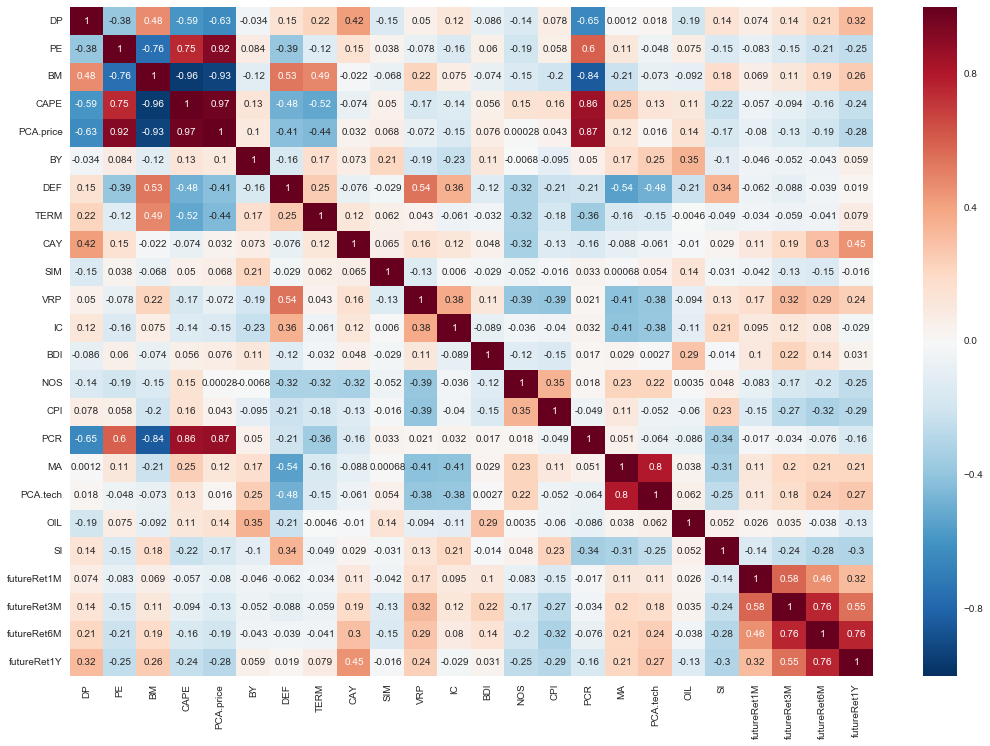

In [6]:
sns.heatmap(df.corr(), annot=True);

### Comparing Dispersion

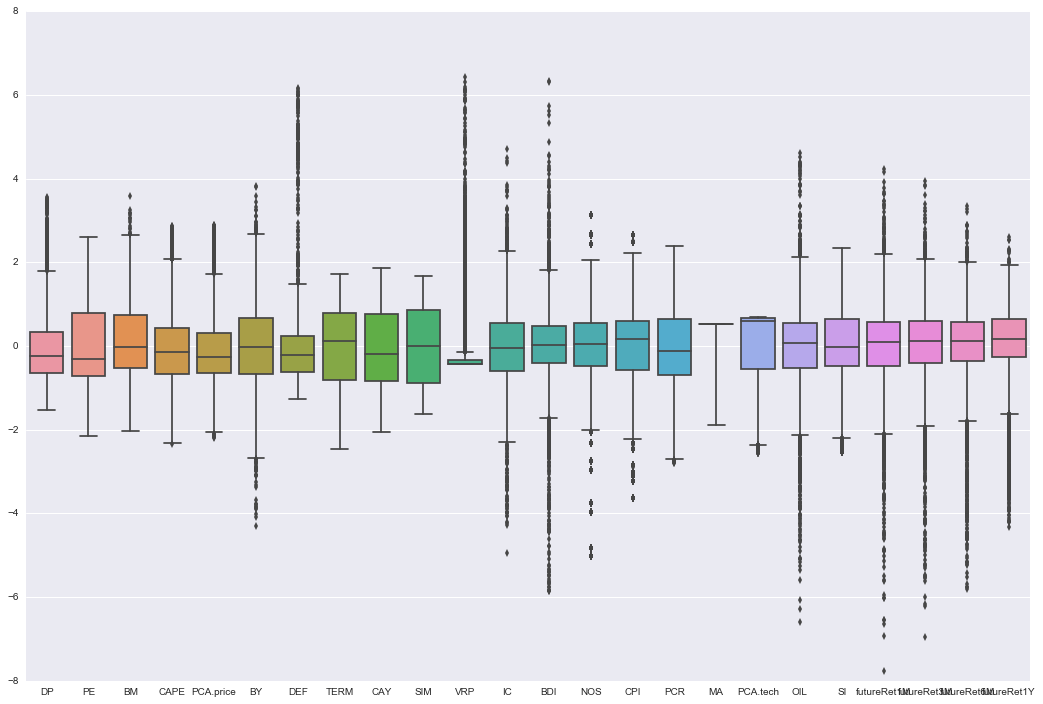

In [7]:
df_norm = (df - df.mean()) / df.std()

sns.boxplot(data=df_norm);

## Returns Dataframe

In [8]:
returns = df[['futureRet1M', 'futureRet3M', 'futureRet6M', 'futureRet1Y']]
returns.head()

,futureRet1M,futureRet3M,futureRet6M,futureRet1Y
Date,,,,
1990-06-01,-0.008295,-0.116913,-0.095993,0.070867
1990-06-04,-0.032420,-0.124505,-0.110181,0.054709
1990-06-05,-0.022675,-0.134623,-0.112129,0.055955
1990-06-06,-0.015018,-0.120898,-0.104064,0.053689
1990-06-07,-0.018510,-0.121414,-0.106570,0.054863


## Kitchen Sink Approach

### Create Dataframe

In [9]:
ks = df.iloc[:,4:-4]
ks.columns

Index([u'PCA.price', u'BY', u'DEF', u'TERM', u'CAY', u'SIM', u'VRP', u'IC',
       u'BDI', u'NOS', u'CPI', u'PCR', u'MA', u'PCA.tech', u'OIL', u'SI'],
      dtype='object')

## Drop NaNs

In [10]:
ks_no_na = ks.dropna()
returns_no_na = returns.dropna()

### Run Regressions

In [11]:
FIRST_DATE = '2001-05-31'

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

max_date = min(max(returns_no_na.index), max(ks_no_na.index))

date = pd.to_datetime(FIRST_DATE)

predictions = {}

while date <= max_date:
    if date in ks_no_na.index:
        # fit model with 10 years of data 
        # or everything from beginning to date
        # (whatever's smallest)
        min_date = max(date - DateOffset(years=10), min(ks_no_na.index))
        lin_reg.fit(ks_no_na[min_date:date], returns[min_date:date])
        # get the next date with info
        next_date = date + DateOffset(days=1)
        while next_date not in ks_no_na.index:
            next_date += DateOffset(days=1)
        # store prediction
        predictions[date] = lin_reg.predict(ks_no_na.loc[next_date].reshape(1,-1))
    date += DateOffset(days=1)

### Get Predictions

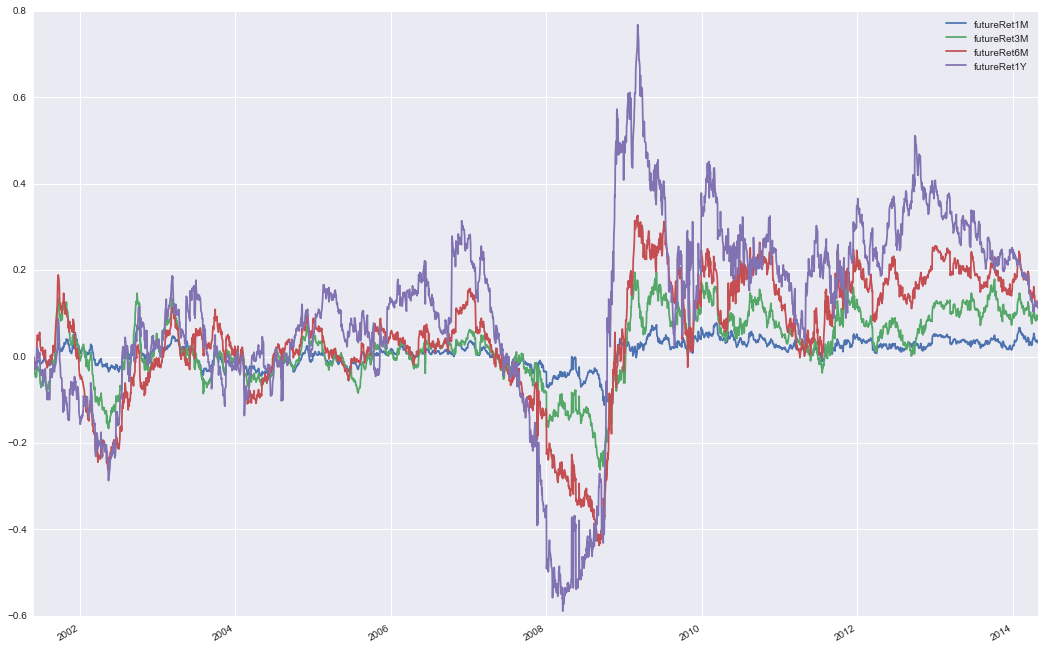

In [16]:
pred_flat = {i: predictions[i].flatten() for i in predictions.keys()}
pred_df = pd.DataFrame.from_dict(pred_flat, 'index')
pred_df.columns = returns.columns
pred_df.plot();

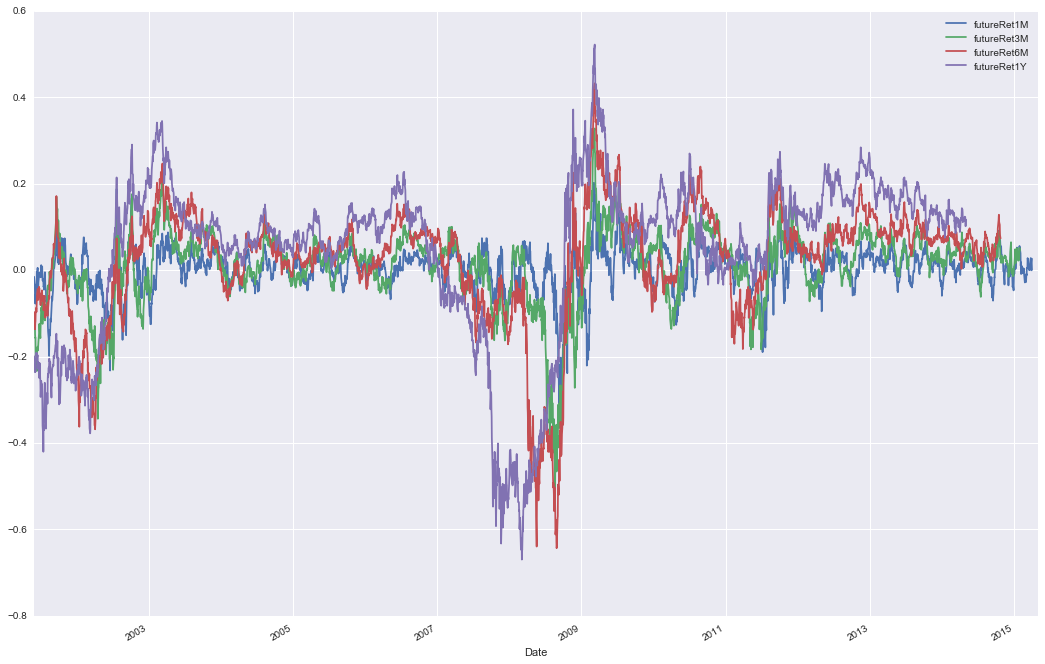

In [15]:
returns.ix[FIRST_DATE:].plot();

## TODO

- Adjust dates to compare predictions and observations
- Remove "outliers" from Great Recession
- Reproduce other analyses by original paper
- Stepwise selection
- Dynamic regression with previous returns